# Steel Seasonality Study

For the first part of the study I use a time series decomposition model to isolate seasonality in the Steel price. The model used is based on the STL (Seasonal-Trend decomposition using Loess) algorithm proposed by Robert B. Cleveland in 1990

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose, STL

## Data

In [2]:
ticker = 'HRC=F'

data = pd.DataFrame(yf.download(ticker, start = "2008-11-01", end='2023-11-01'))

data_test = data.reset_index().dropna()
data_test = data_test[["Date", "Close"]].copy()
data_test = data_test.resample('m', on='Date').mean().ffill().reset_index()
data_test.Date = pd.to_datetime(data_test.Date)
data_test['Date'] = data_test['Date'].dt.strftime('%Y-%m')
data_test['Date'] = pd.to_datetime(data_test['Date'])
data_test = data_test.set_index('Date')
data_test.head()

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2008-11-01,621.842105
2008-12-01,546.818182
2009-01-01,526.842105
2009-02-01,504.444444
2009-03-01,479.571429


In [3]:
years = data_test.index.year.unique()

## Naive Model

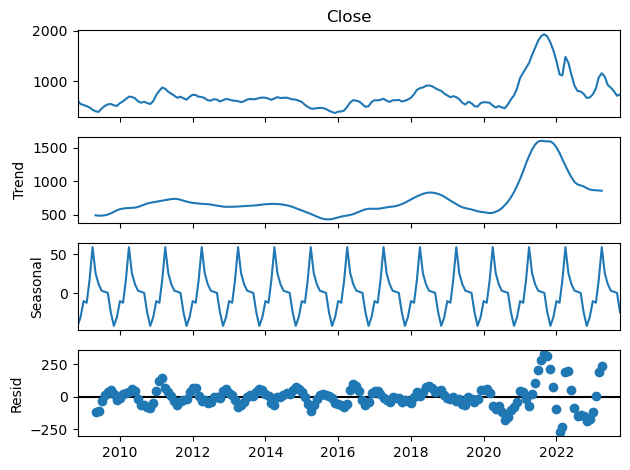

In [4]:
decomposition_results = seasonal_decompose(data_test.Close, model="additive")
decomposition_results.plot()
plt.show()

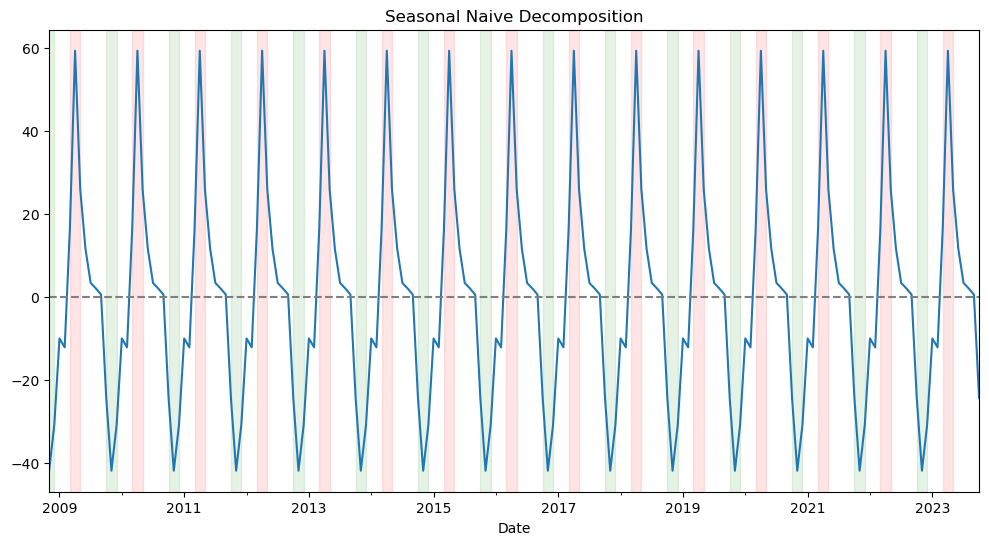

In [5]:
plt.figure(figsize=(12,6))
decomposition_results._seasonal.plot()

for i in years:
    plt.axvspan(xmin=f'{i}-03-01', xmax=f'{i}-05-01', color='r', alpha=0.1)
    plt.axvspan(xmin=f'{i}-10-01', xmax=f'{i}-12-01', color='g', alpha=0.1)

plt.axhline(0, color='gray', linestyle='--')
plt.title('Seasonal Naive Decomposition')
plt.show()

## STL Model

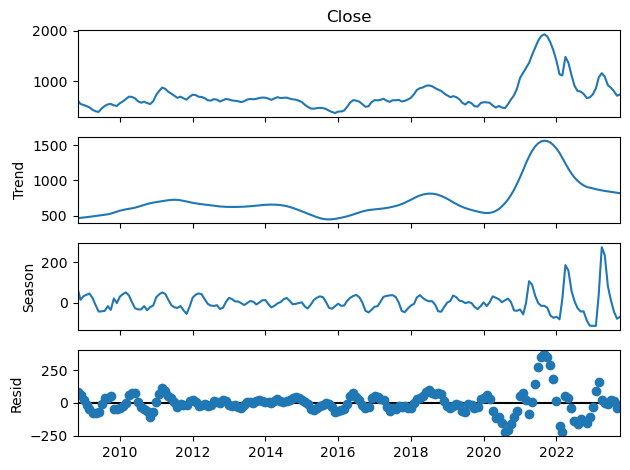

In [6]:
stl_decomposition = STL(data_test.Close).fit()
stl_decomposition.plot()
plt.show()

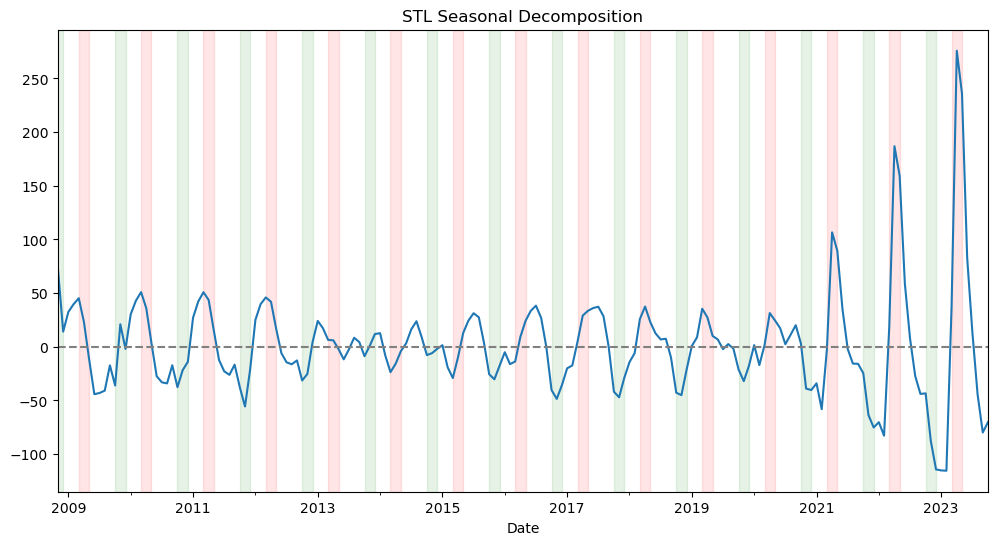

In [7]:
plt.figure(figsize=(12,6))
stl_decomposition._seasonal.plot()

for i in years:
    plt.axvspan(xmin=f'{i}-03-01', xmax=f'{i}-05-01', color='r', alpha=0.1)
    plt.axvspan(xmin=f'{i}-10-01', xmax=f'{i}-12-01', color='g', alpha=0.1)

plt.axhline(0, color='gray', linestyle='--')
plt.title('STL Seasonal Decomposition')
plt.show()

In [8]:
seasonal_df = stl_decomposition.seasonal.to_frame(name='Seasonal')
seasonal_df['Seasonal'] = round(seasonal_df['Seasonal'], 2)
seasonal_df['Months'] = seasonal_df.index.month
seasonal_df['Years'] = seasonal_df.index.year

seasonal_df = seasonal_df.pivot_table(index='Years', columns='Months', values='Seasonal')
seasonal_df

Months,1,2,3,4,5,6,7,8,9,10,11,12
Years,,,,,,,,,,,,
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.31,14.10
2009,32.44,39.61,45.24,23.08,-11.75,-44.20,-43.09,-40.89,-17.31,-36.08,20.93,-2.05
2010,30.25,42.91,50.91,35.80,3.18,-27.47,-33.15,-34.12,-17.24,-37.65,-21.84,-14.03
2011,27.07,42.16,50.82,43.63,15.00,-12.34,-22.89,-26.15,-16.68,-37.73,-55.66,-20.69
2012,25.03,39.68,45.96,41.89,16.70,-5.93,-14.51,-16.29,-12.74,-31.42,-25.40,4.26
2013,24.06,17.27,6.38,5.98,-2.14,-11.75,-2.46,8.38,4.36,-8.82,0.78,11.83
2014,12.65,-8.17,-23.66,-15.77,-4.10,3.06,16.23,23.77,8.96,-7.76,-5.94,-1.90
2015,1.43,-19.08,-29.15,-9.74,12.90,24.38,31.24,27.47,3.57,-25.61,-30.30,-17.77
2016,-5.07,-16.19,-13.75,9.21,24.14,33.47,38.31,26.86,-0.34,-40.32,-48.57,-35.74


## Seasonality Analysis

The analysis shows that the price of steel has a positive seasonal component in April and a negative one in November

In [9]:
sample_start = '2018-01-01'
sample_end = '2020-01-01'

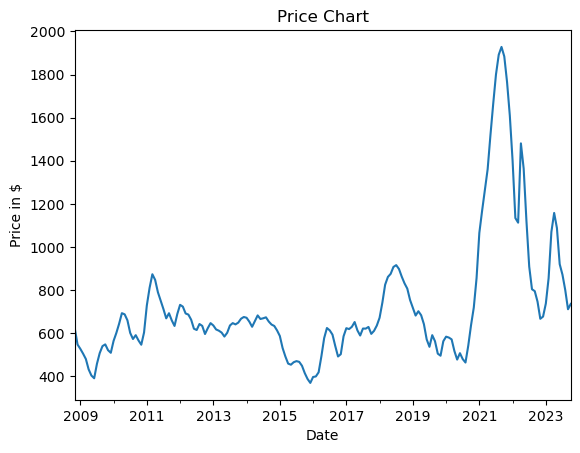

In [10]:
decomposition_results._observed.plot()
plt.title('Price Chart')
plt.ylabel('Price in $')
plt.show()

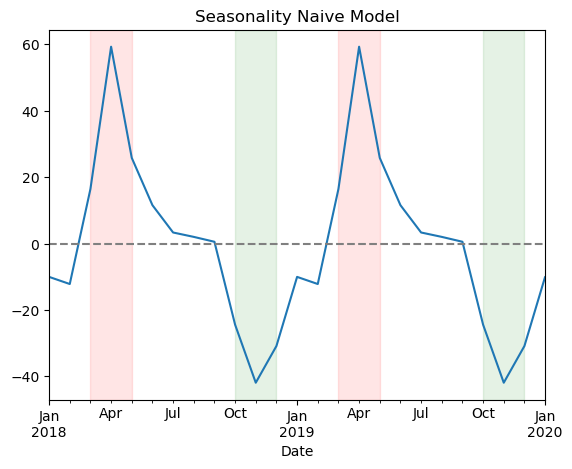

In [11]:
decomposition_results._seasonal.plot()
plt.xlim(sample_start, sample_end)
plt.title('Seasonality Naive Model')

for i in years:
    plt.axvspan(xmin=f'{i}-03-01', xmax=f'{i}-05-01', color='r', alpha=0.1)
    plt.axvspan(xmin=f'{i}-10-01', xmax=f'{i}-12-01', color='g', alpha=0.1)

plt.axhline(0, color='gray', linestyle='--')
plt.show()

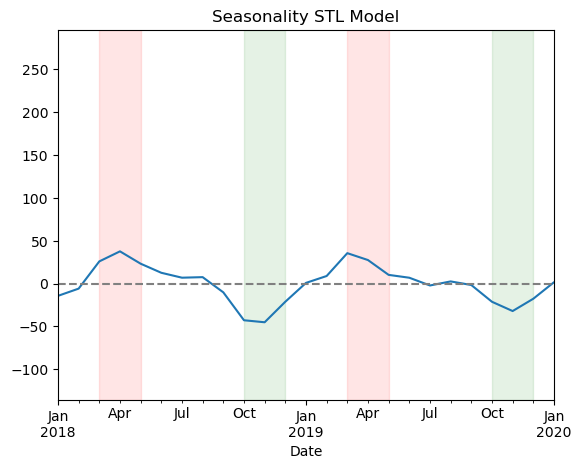

In [12]:
stl_decomposition.seasonal.plot()
plt.xlim(sample_start, sample_end)
plt.title('Seasonality STL Model')

for i in years:
    plt.axvspan(xmin=f'{i}-03-01', xmax=f'{i}-05-01', color='r', alpha=0.1)
    plt.axvspan(xmin=f'{i}-10-01', xmax=f'{i}-12-01', color='g', alpha=0.1)

plt.axhline(0, color='gray', linestyle='--')
plt.show()

## Seasonality in China's Steel

To confirm that seasonality was the same in both the American and international markets, I chose to analyze the price of Chinese steel, as China is the world's largest producer of the material

In [13]:
china = pd.read_csv("STEEL HRC FOB CHINA Futures Historical Data.csv")
china = china[['Date', 'Price']]
china['Date'] = pd.to_datetime(china.Date)
china['Date'] = china['Date'].dt.strftime('%Y-%m')
china['Date'] = pd.to_datetime(china['Date'])
china.set_index('Date', inplace=True)
china.sort_index(inplace=True)
china.head()

,Price
Date,
2019-04-01,528.19
2019-05-01,515.81
2019-06-01,491.95
2019-07-01,506.70
2019-08-01,480.35


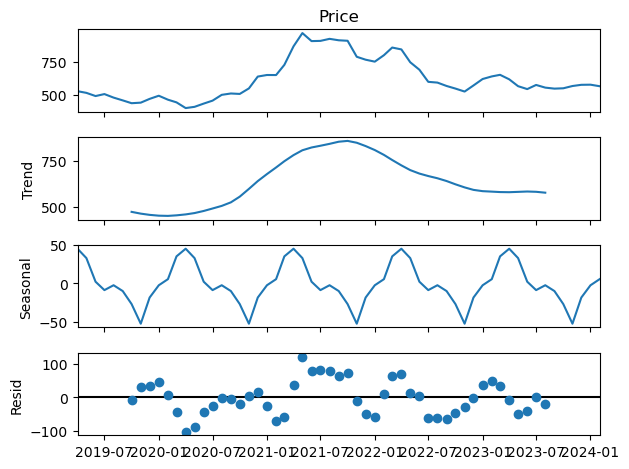

In [14]:
china_results = seasonal_decompose(china.Price, model="additive")

china_results.plot()
plt.show()

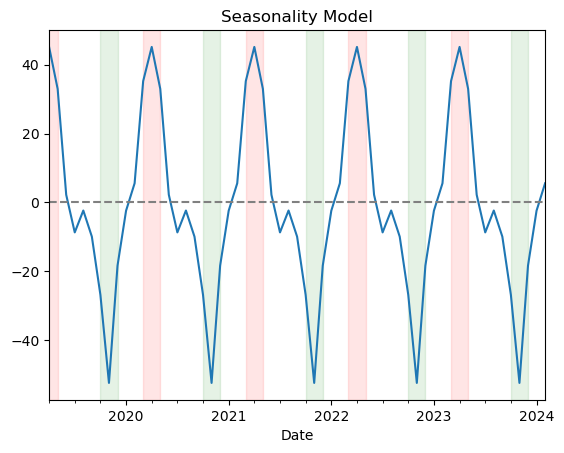

In [15]:
china_results._seasonal.plot()

for i in years:
    plt.axvspan(xmin=f'{i}-03-01', xmax=f'{i}-05-01', color='r', alpha=0.1)
    plt.axvspan(xmin=f'{i}-10-01', xmax=f'{i}-12-01', color='g', alpha=0.1)

plt.axhline(0, color='gray', linestyle='--')
plt.title('Seasonality Model')
plt.show()

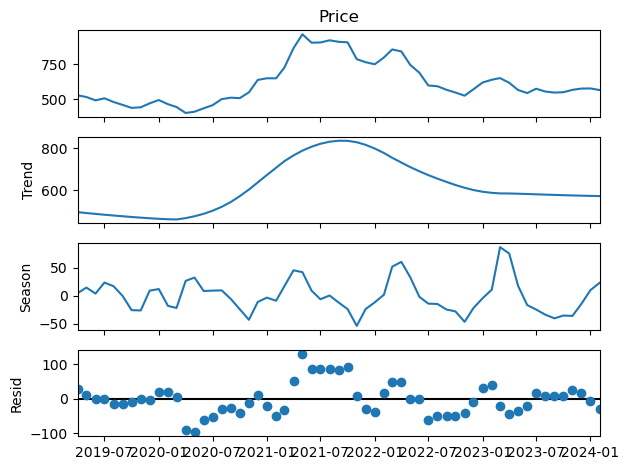

In [16]:
china_stl = STL(china.Price).fit()
china_stl.plot()
plt.show()

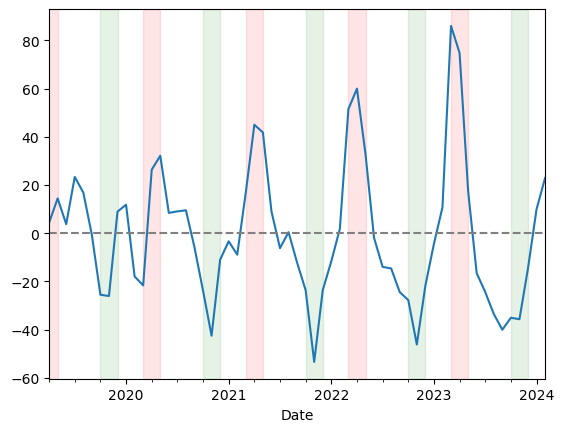

In [17]:
china_stl.seasonal.plot()

for i in years:
    plt.axvspan(xmin=f'{i}-03-01', xmax=f'{i}-05-01', color='r', alpha=0.1)
    plt.axvspan(xmin=f'{i}-10-01', xmax=f'{i}-12-01', color='g', alpha=0.1)

plt.axhline(0, color='gray', linestyle='--')
plt.show()